In [1]:
library(fields)
library(coda)
library(ggplot2)

Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.6-0 (2020-12-14) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 



# Introduction

> Marks are indicated in square brackets. The data file `myscores.txt` is available in the same directory as this notebook file, and can therefore be read in using only the filename. 

# The Problem

> We wish to analyse some data that records the numbers of plants of a particular species that survive infection with a particular disease. The data was collected from $N$ different labs, with each lab having grown a different number of plants and then having infected them with the disease. More precisely, the data takes the form $\{(y_{i}, n_{i})\}_{i\in [1..N]}$, where $n_{i}\in\mathbb{N}$ is the number of plants grown by lab $i$, and $y_{i}\in\mathbb{N}$ is the number of plants that survived the disease in lab $i$. We will denote $\{y_{i}\}$ by $y$ and $\{n_{i}\}$ by $n$.

# Question 1

Read in the data from file 'myscores.txt'. [2]

## Answer

In [2]:
# YOUR CODE HERE
scores <- read.table("myscores.txt",header=TRUE, sep=" ")

> The following command should show the first six rows, starting with $(21, 26)$, $(15, 16)$.

In [3]:
head(scores)

,y,n
,<int>,<int>
1,21,26
2,15,16
3,12,12
4,15,17
5,11,18
6,14,15


> In order to allow for variations between labs, we model each lab $i$ as having an innate 'survival' factor, represented by a number $\theta_{i}\in\mathbb{R}$. If we know $\theta_{i}$, whether a given plant survives is independent of whether other plants do so, and, in the absence of further information, by symmetry, we can take the probability of survival given $\theta_{i}$ to be the same for all plants in lab $i$. Without loss of generality, we can therefore take $\theta_{i}\in [0, 1]$ to be the probability that any given plant in lab $i$ survives. We will denote $\{\theta_{i}\}$ by $\theta$. The probability $P(y \mid \theta, n)$ therefore takes the form:
$$
P(y \mid \theta, n) = \prod_{i = 1}^{N} P(y_{i} \mid \theta_{i}, n_{i})
$$

# Question 2

Show that the probability $P(y_{i} \mid \theta_{i}, n_{i})$ is binomial. [6]

## Answer

YOUR ANSWER HERE

A binomial distribution is a discrete distribution that gives the probability of survivals in n independent trials where each trial has one of two possible outcomes, Since the number of trials is $n_i$, and the number of successes which is a survival is $y_i$ then the probability of success for two possible outcomes (Survival or death) is $\theta_i$ then $P(y_i | \theta_i, n_i)$ is binomial. The functional form of one lab the binomial distribution is given by:

$$ 
P(y_{i} \mid \theta_{i}, n_{i}) = \binom{n}{y}\: \theta^{y} \: (1-\theta)^{n-y}
$$
It can express by binomial distribution
For $N$ number of lab is 
$$
P(y \mid \theta, n) = \prod_{i = 1}^{N} P(y_{i} \mid \theta_{i}, n_{i})
$$

# Question 3

Derive the maximum likelihood estimate $\hat{\theta}_{i}$ of $\theta_{i}$. [4]

Compute the $\hat{\theta}$ and plot their histogram. [2]

## Answer

First,
$$
\prod_{i}\theta^{y}(1-\theta)^{n-y} = \theta^{\sum_{i} y_i}(1-\theta)^{\sum_{i}n_i-y_i}
$$
That shows how we get the factors in the likelihood.

We can derive this by taking the log of the likelihood function and finding where its derivative is zero:

$$
\ln\left(nCy~\theta_{i}^y(1-\theta_{i})^{n-y}\right) = \ln(nCy)+y\ln(\theta_{i})+(n-y)\ln(1-\theta_{i})
$$

Take derivative with respect to $\theta$ and set to 0:

$$
\frac{d}{d\hat{\theta}}\ln(nCy)+y\ln(\hat{\theta})+(n-y)\ln(1-\hat{\theta}) = \frac{y}{\hat{\theta}}- \frac{n-y}{1-\hat{\theta}} = 0
\implies \frac{n}{y} = \frac{1}{\hat{\theta}} \implies \hat{\theta} = \frac{y}{n}
$$

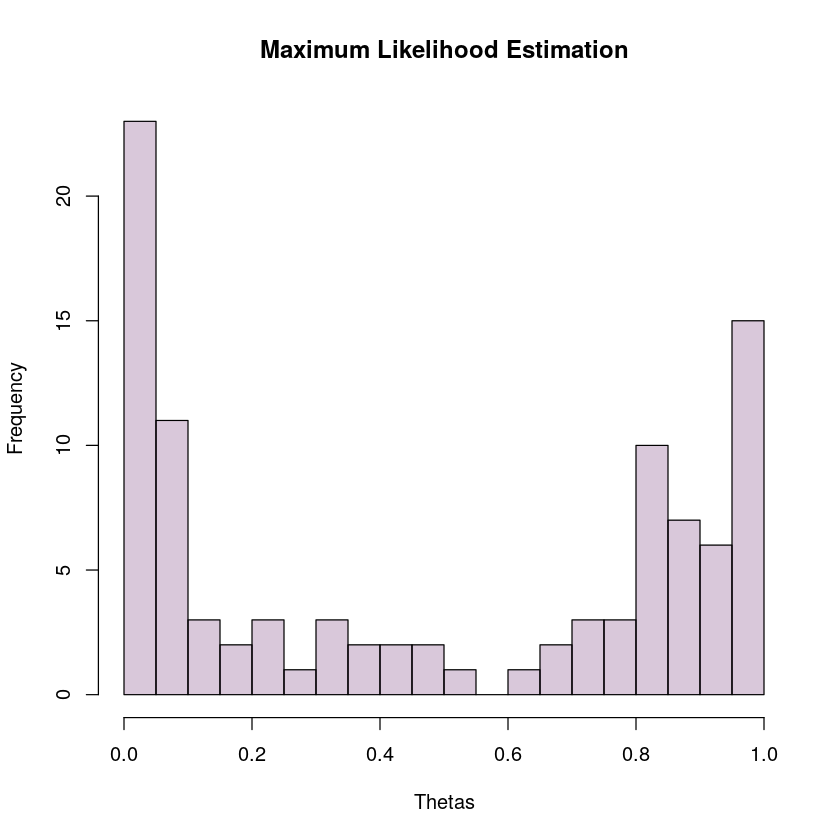

In [4]:
# YOUR CODE HERE
num<-nrow(scores)
mles<-list()

for (i in 1:num){
    mle<-scores[i,1]/scores[i,2]
    mles[[length(mles) + 1]] <- mle
}

hist(as.numeric(unlist(mles)),col="#68246d40",main="Maximum Likelihood Estimation", xlab="Thetas", ylab = "Frequency", breaks=15)


> We suppose that given knowledge of two parameters, $a$ and $b$, the values of the $\theta_{i}$ are independent, and our knowledge of each of them can be represented by a Beta probability distribution ($B(a, b)$ is the Beta function):
$$
\begin{aligned}
P(\theta \mid a, b) & = \prod_{i} P(\theta_{i} \mid a, b) \\
P(\theta_{i} \mid a, b) & = d\theta\:  {\theta_{i}^{a - 1}(1 - \theta_{i})^{b-1} \over B(a, b)} \\
\end{aligned}
$$ 

# Question 4

Show that the distribution $P(\theta \mid y, n, a, b)$ is a product over $i$ of Beta distributions for each $\theta_{i}$, and derive their parameters. [6]

Therefore explain why is the beta distribution a convenient choice for $P(\theta_{i} \mid a, b)$. [3]

## Answer 

Likelihood is binomial distribution and prior is Beta distribution. So posterior is $P(\theta_{i} \mid y_{i}, n_{i}, a, b)$ and it is propotional like under

By the Bayes theorem and suppose $a ,b$ as one feature

The 
$$P(\theta|y, n, a, b) = {P(y|\theta, n) P(\theta|a, b) \over \int P(y|\theta, n) P(\theta|a, b)d\theta}$$
since $P(y|\theta, n) = \prod_i P(y_i|\theta_i, n_i)$ and $P(\theta|a, b) = \prod_i P(\theta_i, a, b)$ then we substitute 


$$P(\theta|y, n, a, b) = {\prod_i P(y_i|\theta_i, n_i) \prod_i P(\theta_i| a, b) \over \int \prod_i P(y_i|\theta_i, n_i) P(\theta_i| a, b) d\theta}$$

finally 

$$P(\theta|y, n, a, b) = {\prod_i P(y_i|\theta_i, n_i) P(\theta_i| a, b) \over \int \prod_i P(y_i|\theta_i, n_i) P(\theta_i| a, b)d\theta}$$

$$P(\theta|y, n, a, b) = {\prod_i \binom {n_i}{y_i}B(a,b)^{-1} \theta_i^{y_i} (1-\theta_i)^{n_i-y_i} \theta_i^{a-1} (1-\theta_i)^{b-1} \over \int \prod_i \binom {n_i}{y_i}B(a,b)^{-1}\theta_i^{y_i} (1-\theta_i)^{n_i-y_i} \theta_i^{a-1} (1-\theta_i)^{b-1} d\theta}$$

$$P(\theta|y, n, a, b) = {\prod_i \theta_i^{y_i+a-1} (1-\theta_i)^{n_i-y_i+b-1} \over \int \prod_i \theta_i^{y_i+a-1} (1-\theta_i)^{n_i-y_i+b-1}d\theta}$$


It is also Beta distribution. Therefore, $P(\theta|y, n, a, b)$ is a product of Beta distributions over $i$.


$$
P(\theta_{i} \mid y_{i}, n_{i}, a, b) = \prod_{i} Beta(a + y_{i}, b + n_{i} - y_{i})\\
$$


YOUR ANSWER HERE

The reason to choose Beta prior is to simplify the computation of the posterior distribution. This works well because a conjugate prior to Beta distribution is the same family as posterior. Therefore, it makes the posterior distribution a Beta distribution.

> Suppose that our knowledge of $a$ and $b$ in the absence of any data is described by a distribution $P(a, b) = da\: db\: \pi(a, b)$.

# Question 5

Show that the distribution $P(a, b \mid y, n)$ takes the following form. [10]
$$
P(a, b \mid y, n)  \propto P(a, b) \prod_{i} {B(a + y_{i}, b + n_{i} - y_{i}) \over B(a, b)}  
$$

## Answer 

YOUR ANSWER HERE

By the Bayes theorem and suppose $a ,b$ as one feature

$$
\begin{aligned}
P(a, b \mid y, n) = {P(y \mid n, a, b)P(a, b\mid n)\over P(y \mid n)}\\
\end{aligned}
$$

with Cox's theorem partition,

$$
\begin{aligned}
= {\int_{\theta}P(y \mid \theta_{i}, n, a, b)P(\theta_{i} \mid n, a, b)P(a, b\mid n)\over P(y \mid n)}\\
\end{aligned}
$$


Some features have no affect to main probability feature which is independent could eliminate,

$$
\begin{aligned}
\propto \int_{\theta}P(y \mid \theta_{i}, n)P(\theta_{i} \mid a, b)P(a, b)\\
\end{aligned}
$$

With Likelihood function and Prior which get from the previous,

$$
\begin{equation} \label{eq2}
\begin{split}
P(a, b \mid y, n) & \propto P(a, b) \prod_{i} {\int_{0}^{1} n_iCy_i~\theta_{i}^{y_i}(1-\theta_{i})^{n_i-y_i} d\theta\:  \theta_{i}^{a - 1}(1 - \theta_{i})^{b-1} \over B(a, b)}\\
& \propto P(a, b) \prod_{i} {\int_{0}^{1} \theta_{i}^{a+y_i-1}(1-\theta_{i})^{b+n_i-y_i-1} d\theta\: \over B(a, b)}\\
\end{split}
\end{equation}
$$

Also it numerator can express by Beta function Therefore,

$$
\begin{aligned}
P(a, b \mid y, n)  \propto P(a, b) \prod_{i} {B(a + y_{i}, b + n_{i} - y_{i}) \over B(a, b)}  
\end{aligned}
$$

> Now we need to define a prior $P(a, b)$. There are many ways to do this. We will choose the very simple, improper prior with $\pi(a, b)$ constant.

# Question 6

Write an R function to evaluate the logarithm of the density with respect to $da\: db$ of $P(a, b)$ (up to an overall additive constant). [2]

## Answer 

In [5]:
labPrior = function(a, b){
  
  # YOUR CODE HERE
    #Improper prior with constant that set to adjust value of next question.
    labP<-859 
  return(labP)
}


# Question 7

Write an R function to evaluate the logarithm of the density with respect to $da\: db$ of $P(a, b \mid y, n)$ (up to a overall additive constant), using `scores` as default data. [10]

## Answer 

In [6]:
# YOUR CODE HERE
# Function with a and b which got logarithm on question 5 distribution
labPo <- function (a, b){
    y<-scores$y
    n<-scores$n
    res<-labPrior(a,b)+sum(lbeta(a+y,b+n-y)-lbeta(a,b))
    return(res)
}
labPo(1,2)


[1] 1.594794

# Question 8

Compute the value of the logarithm of the density (with respect to $da\: db$) of $P(a, b \mid \{y_{i}\}, \{n_{i}\})$ on a rectangular grid of $(a, b)$ values over appropriate ranges. [3]

Make contour and image plots of these values and of the corresponding probability densities (up to a multiplicative constant). [3]

Use the probability densities to compute the expectations and standard deviations of $a$ and $b$ under $P(a, b \mid \{y_{i}\}, \{n_{i}\})$. [4]

## Answer 

In [7]:
# YOUR CODE HERE
# Set the value of a and b
a<-seq(0.01,1,by=0.01)
b<-seq(0.01,1,by=0.01)
d<-matrix(ncol=length(a),nrow=length(b))

# Set function of exponentiated question 5 distribution
beta_pro<-function(a,b){
    return(exp(labPo(a,b)))
}

# Compute the value of density in grid of a and b
for (i in 1:length(a)){
    for (j in 1:length(b)){
        d[i,j] <- labPo(a[i],b[j])
    }
}
# Exponentiate
exd<-exp(d)

# Normalise the discrete density distribution
normald3<-exd/sum(exd)


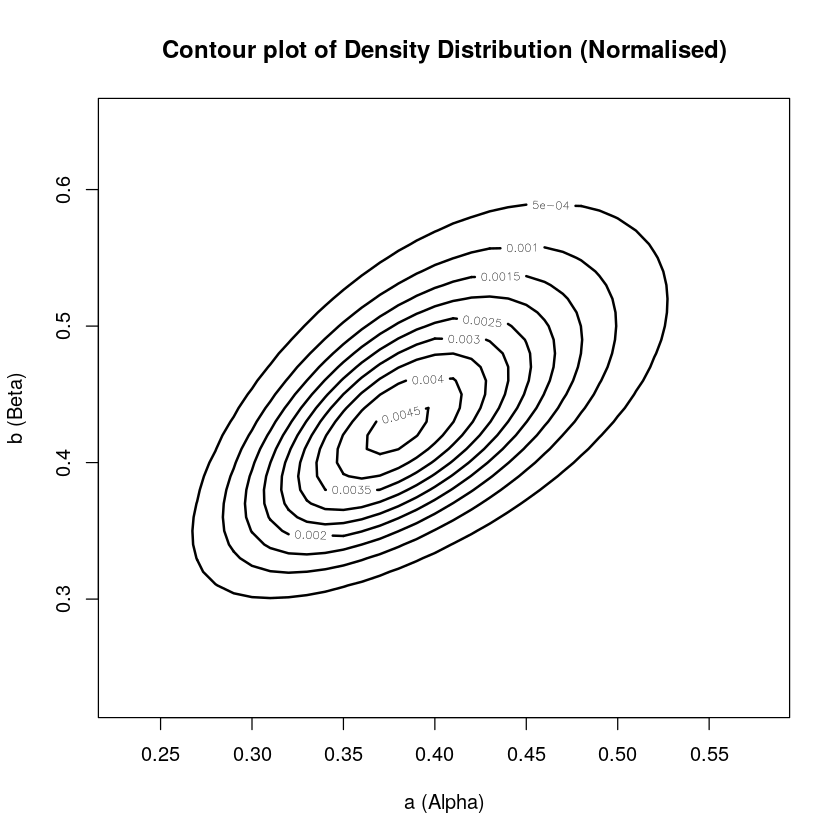

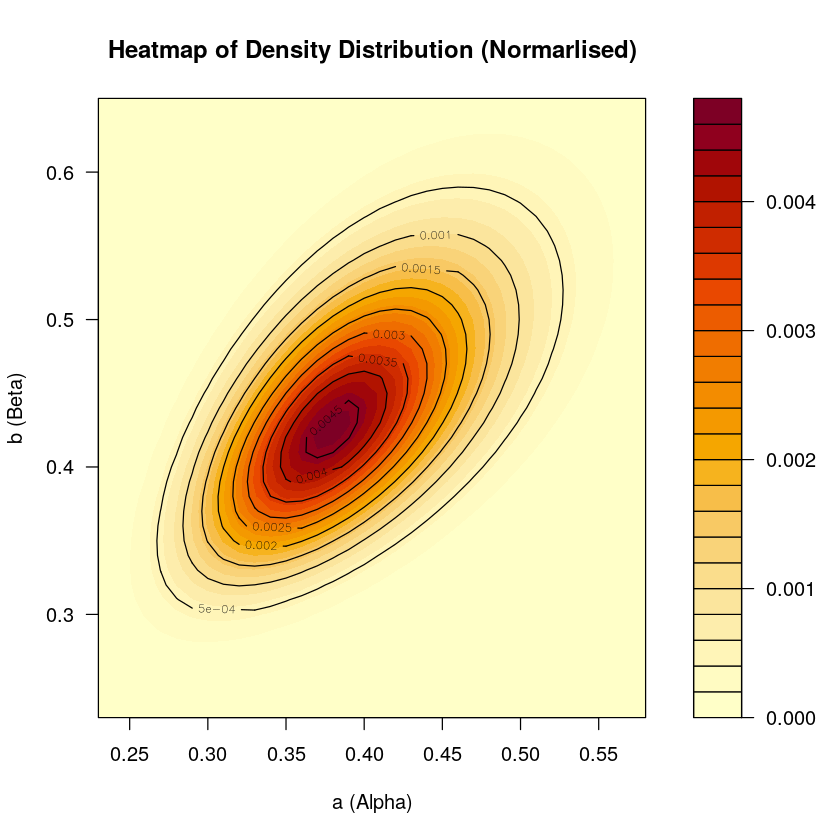

In [8]:
# YOUR CODE HERE
# Plot contour and heatmap for visualise the density distribution
contour(a,b,normald3,xlim=c(0.23,0.58),ylim=c(0.23,0.65), lwd=2, 
        main="Contour plot of Density Distribution (Normalised)", xlab="a (Alpha)", ylab = "b (Beta)")
filled.contour(a,b,normald3,plot.axes = {
  axis(1)
  axis(2)
  contour(a,b,normald3, add = TRUE, lwd = 1)
  },xlim=c(0.23,0.58),ylim=c(0.23,0.65), 
               plot.title = title(main = "Heatmap of Density Distribution (Normarlised)", xlab="a (Alpha)", ylab = "b (Beta)"))

[1] "Estimated expected value of a is: 0.396117618799692"
[1] "Estimated expected value of b is: 0.444262760054853"
[1] "Estimated standard deviation of a is: 0.0629313434357464"
[1] "Estimated standard deviation of b is: 0.0700993986084116"


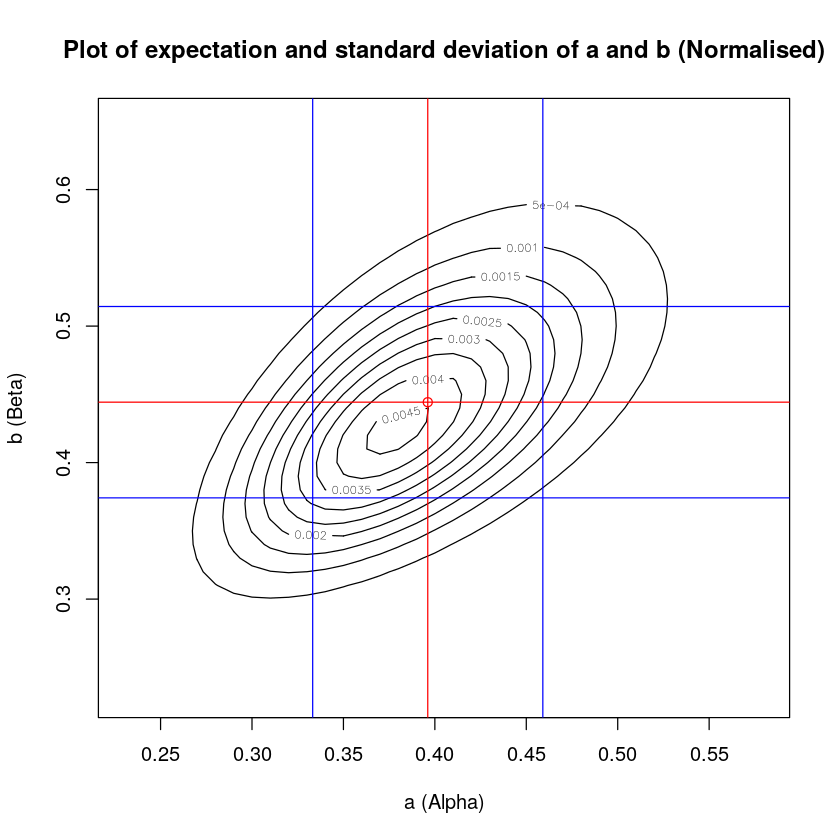

In [9]:
# YOUR CODE HERE

# Calculate expectation of b
erdb<-matrix(nrow=length(a))
edb<-matrix(ncol=length(b))
for (i in 1:length(a)){
    for (j in 1:length(b)){
        erdb[j] <-b[j]*normald3[i,j]
    }
    edb[i]<-(sum(erdb))
}
expectb<-sum(edb)

# Calculate expectation of a
erda<-matrix(nrow=length(a))
eda<-matrix(ncol=length(b))
for (i in 1:length(a)){
    for (j in 1:length(b)){
        erda[j] <-a[j]*normald3[j,i]
    }
    eda[i]<-(sum(erda))
}
expecta<-sum(eda)

# Calculate expectation of b^2
erdb2<-matrix(nrow=length(a))
edb2<-matrix(ncol=length(b))
for (i in 1:length(a)){
    for (j in 1:length(b)){
        erdb2[j] <-b[j]^2*normald3[i,j]
    }
    edb2[i]<-(sum(erdb2))
}
expectb2<-sum(edb2)

# Calculate expectation of a^2
erda2<-matrix(nrow=length(a))
eda2<-matrix(ncol=length(b))
for (i in 1:length(a)){
    for (j in 1:length(b)){
        erda2[j] <-a[j]^2*normald3[j,i]
    }
    eda2[i]<-(sum(erda2))
}
expecta2<-sum(eda2)

# Calculate standard deviation of a and b
stana<-sqrt(expecta2-expecta^2)
stanb<-sqrt(expectb2-expectb^2)

# Print and Plot the expectation and standard deviation of a and b
contour(a,b,normald3,xlim=c(0.23,0.58),ylim=c(0.23,0.65),main="Plot of expectation and standard deviation of a and b (Normalised)", xlab="a (Alpha)", ylab = "b (Beta)")
points(expecta,expectb, col='red')
print(paste("Estimated expected value of a is:", expecta))
print(paste("Estimated expected value of b is:", expectb))
print(paste("Estimated standard deviation of a is:", stana))
print(paste("Estimated standard deviation of b is:", stanb))
abline(v=expecta, col="red")
abline(h=expectb, col="red")
abline(v=expecta+stana, col="blue")
abline(v=expecta-stana, col="blue")
abline(h=expectb+stanb, col="blue")
abline(h=expectb-stanb, col="blue")

# Question 9

Write down the distributions $P(a \mid b, y, n)$ and $P(b \mid a, y, n)$ up to multiplicative constants. [2] 

Write R functions to perform Gibbs sampling to generate samples of $a$ and $b$. Hint: you may want to use a Metropolis-Hastings step to sample from the above conditionals. [10]

Generate 5,000 samples of $(a, b)$ and plot traces of the samples and of their autocorrelation. [4]

Compute estimates of the expectations and standard deviations of $a$ and $b$ using the samples. [4]

Compute the effective sample sizes, the Monte-Carlo standard errors of the mean estimates, and the acceptance rates. [4]

What are appropriate choices for the number of burn-in iterations and the thinning factor? Justify your answers. [4]

## Answer 

YOUR ANSWER HERE

Originally, if we used the Bayes rule and Cox's theorem, it can be strictly definite up to multiplicative constants like below.  
$$P(a | b, y, n) = \prod_i {P(a, b) P(y_i|) P(y_i | \theta_i, a, b) P(\theta_i | a, b) \over P(b | y_i, n_i) P(y_i, n_i)}$$

$$P(b | a, y, n) = \prod_i {P(a, b) P(y_i|) P(y_i | \theta_i, a, b) P(\theta_i | a, b) \over P(a | y_i, n_i) P(y_i, n_i)}$$

For sampling, find a simple form of distribution.
By the Cox's theorem conjunction,
$$
P(a,b \mid y, n) = P(a \mid b, y, n)P(b \mid y,n)\\
\propto P(a \mid b, y, n)\\
P(a,b \mid y, n) = P(b \mid a, y, n)P(a \mid y,n)\\
\propto P(b \mid a, y, n)\\
$$

Therefore,

$$
P(a \mid b, y, n) \propto P(a,b \mid y, n)\\
P(b \mid a, y, n) \propto P(a,b \mid y, n)\\
$$

From question 5 distribution $P(a, b \mid y, n)$

$$
P(a \mid b, y, n) \propto P(a, b) \prod_{i} {B(a + y_{i}, b + n_{i} - y_{i}) \over B(a, b)} \\
P(b \mid a, y, n) \propto P(a, b) \prod_{i} {B(a + y_{i}, b + n_{i} - y_{i}) \over B(a, b)} \\
$$

If we neglect the independent elements, we can find that the conditional probability would be like under, which is the same as the beta distribution for a and b.

$$
\propto P(a \mid b)\\
\propto P(b \mid a)\\
$$

So according to the Hierarchical model, we can use the Beta distribution as a sampler probability density distribution.

In [10]:
# YOUR CODE HERE
#options(warn=0)

# Set initial value
init_a<-0.25
init_b<-0.2

# Set the function for new sample of a using gibbs sampling
gibbsa<-function(oldb){
    
    # Find normalised mean and variance value for fixed b in probability density function of a
    temp<-matrix(ncol=length(a))
    norm<-matrix(nrow=length(a))
    fac<-matrix(nrow=length(a))
    for (k in 1:length(a)){
        fac[k]<-beta_pro(a[k],oldb)
    }
    for (i in 1:length(a)){
        norm[i]<-beta_pro(a[i],oldb)/sum(fac)
        temp[i]<-(a[i]*norm[i])
    }
    mean<-sum(temp)
    temp2<-matrix(ncol=length(a))
    for (i in 1:length(a)){
        temp2[i]<-(a[i]^2*norm[i])
        mean2<-sum(temp2)
    }
    var<-(mean2-mean^2)

    # Find alpha and beta for fixed b in probability density function of a
    alpha<-((mean*(1-mean)/var)-1)*mean
    beta<-((mean*(1-mean)/var)-1)*(1-mean)
    # Get the new random sample from fixed b in probability density function of a 
    newa<-rbeta(1,alpha,beta)

    return(newa)
}

# Set the function for new sample of a using gibbs sampling
gibbsb<-function(olda){
    
    # Find normalised mean and variance value for fixed a in probability density function of b
    temp<-matrix(nrow=length(b))
    norm<-matrix(nrow=length(a))
    fac<-matrix(nrow=length(a))
    for (k in 1:length(a)){
        fac[k]<-beta_pro(olda,b[k])
    }
    for (i in 1:length(b)){
        norm[i]<-beta_pro(olda,b[i])/sum(fac)
        temp[i]<-(b[i]*norm[i])
    }
    mean<-sum(temp)
    temp2<-matrix(nrow=length(b))
    for (i in 1:length(b)){
        temp2[i]<-(b[i]^2*norm[i])
        mean2<-sum(temp2)
    }
    var<-(mean2-mean^2)
    
    # Find alpha and beta for fixed a in probability density function of b
    alpha<-((mean*(1-mean)/var)-1)*mean
    beta<-((mean*(1-mean)/var)-1)*(1-mean)
    # Get the new random sample from fixed a in probability density function of b
    newb<-rbeta(1,alpha,beta)

    return(newb)
}

# Gibbs Sampling procedure
gibbsbeta = function(init_a, init_b, N){
  as <- vector(length = N)
  bs <- vector(length = N)
  # Set initial values
  as[1] = init_a
  bs[1] = init_b
  # Gibbs sampling
  for (i in 2:N) {
      newb = gibbsb(as[i - 1])
      bs[i] = newb
      newa = gibbsa(bs[i])
      as[i] = newa
  }
    samples = rbind(as, bs)
    return(samples)
}

# Run sampling for 5000 iteration
gibbsSample = gibbsbeta(init_a, init_b, 5000)
#gibbsSample

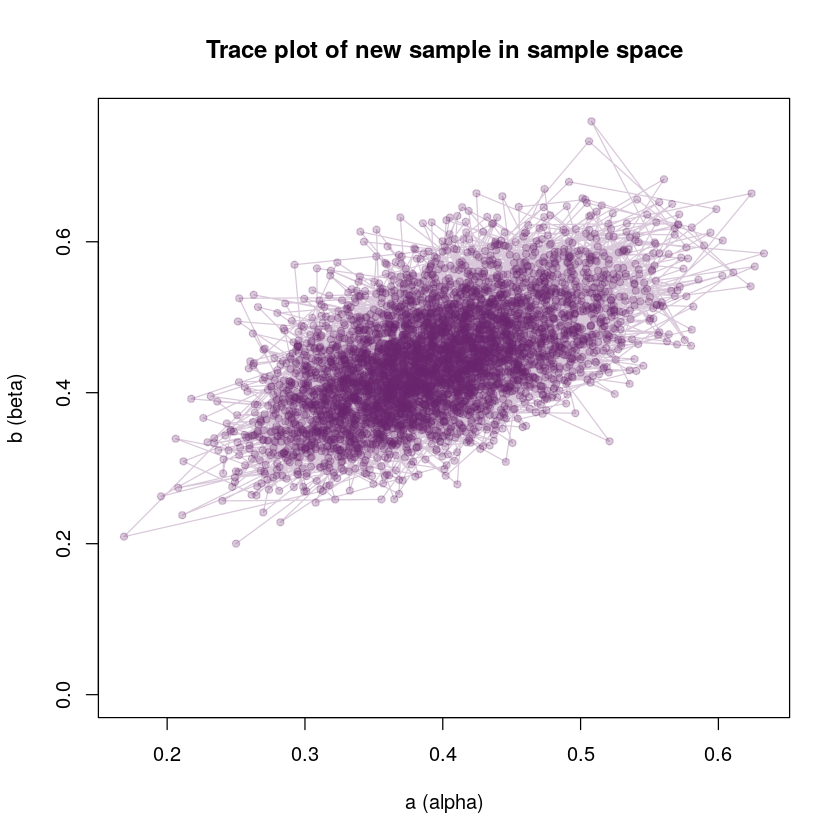

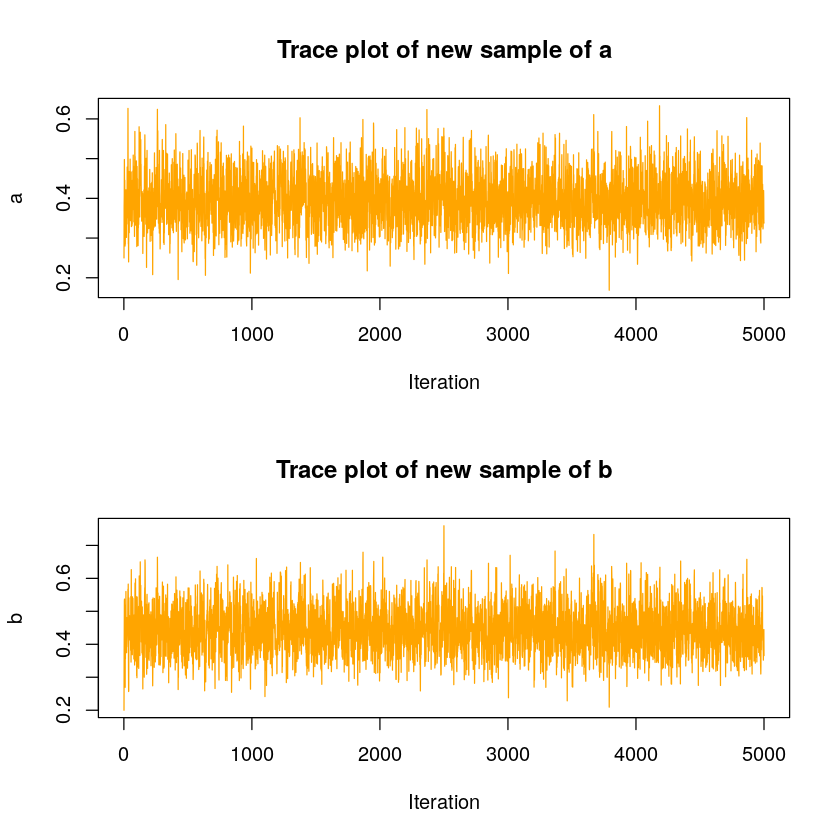

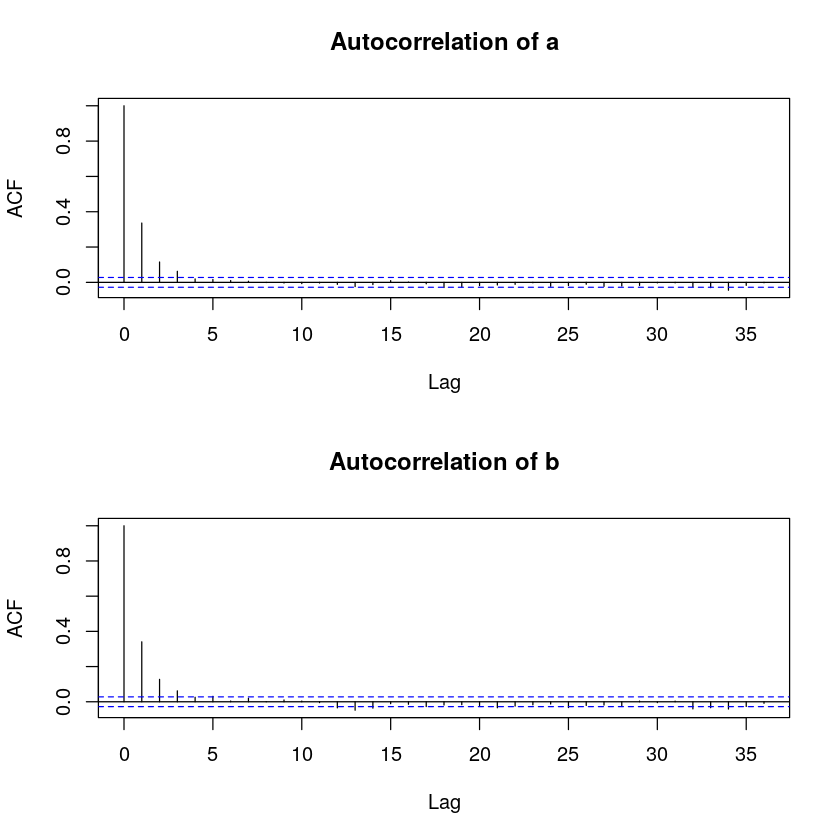

In [11]:
# YOUR CODE HERE

# Put the new samples
as = gibbsSample[1,]
bs = gibbsSample[2,]

# Make data frame
dfsample = as.data.frame(t(gibbsSample))
names(dfsample) = c('as', 'bs')

# Subtract burn-in iteration 10 samples(1~10 is enough)
vas = as[(10 + 1):length(as)]
vbs = bs[(10 + 1):length(bs)]
vdfsample = dfsample[(10 + 1):nrow(dfsample),]

#plot trace and autocorrelation

plot(dfsample, ylim = c(0, max(dfsample$b)), type = 'o', col="#68246d40", pch=20, cex=1.2, main="Trace plot of new sample in sample space", xlab="a (alpha)", ylab = "b (beta)")

par(mfrow = c(2, 1))
plot(as, type = 'l', main="Trace plot of new sample of a", xlab="Iteration", ylab = "a", col='orange')
plot(bs, type = 'l', main="Trace plot of new sample of b", xlab="Iteration", ylab = "b", col='orange')

ACa <- acf(vas, plot = FALSE)
ACb <- acf(vbs, plot = FALSE)
plot(ACa, main = "Autocorrelation of a")
plot(ACb, main = "Autocorrelation of b")



In [12]:
# YOUR CODE HERE

# Calculate of Mean and Standard deviation of a and b
print(paste("Estimated expected value of a is:", mean(vas)))
print(paste("Estimated expected value of b is:", mean(vbs)))
print(paste("Estimated standard deviation of a is:", sd(vas)))
print(paste("Estimated standard deviation of b is:", sd(vbs)))

[1] "Estimated expected value of a is: 0.394910332094047"
[1] "Estimated expected value of b is: 0.442715855398137"
[1] "Estimated standard deviation of a is: 0.0628936017894906"
[1] "Estimated standard deviation of b is: 0.0697841126537156"


In [13]:
# YOUR CODE HERE

# Perform MarkovChain-MonteCarlo method
xab = mcmc(data = vdfsample ,thin=1)

# Get the effective sample size
ESSa = effectiveSize(vas)
ESSb = effectiveSize(vbs)

# Print effective sample size and standard error
print(paste("Effective sample size for a is:", ESSa))    
print(paste("Effective sample size for b is:", ESSb))    
    
print(paste("MCMC standard error of a is:", sqrt(sd(vas)/ESSa)))
print(paste("MCMC standard error of b is:", sqrt(sd(vbs)/ESSb)))

# Probability of acceptance terms is cancel in denominator and numerator. 
# In other words, in each step of the Gibbs sampling algorithm accptace rate is 1
print(paste("Acceptance rate is:", 1))


[1] "Effective sample size for a is: 2480.18748330247"
[1] "Effective sample size for b is: 2454.18732317078"
[1] "MCMC standard error of a is: 0.00503571308304336"
[1] "MCMC standard error of b is: 0.00533242095037182"
[1] "Acceptance rate is: 1"


YOUR ANSWER HERE

-$Burn in$-

Chain depends on the initial value of Gibbs sampling, But usually, the first few iterations need to eliminate burn-in. Samples are collected before the chain has reached its stationary distribution and are usually thrown away. The initial period, whose samples will be ignored, is called the burn-in phase. Usually, just discard the initial 25% of the samples for simplicity.
In this sampling first few steps are not influenced by convergence. However, from the trace of the iteration plot, the burn-in value is enough for under 10 because the high probability of sampling possibility makes samples located in the convergence range.

-$Thinning factor$-

A simple method to reduce the autocorrelation is to use thinning, in which we keep every $n$’th sample. This does not increase the efficiency of the underlying sampler, but it does save space since it avoids storing highly correlated samples. Sometimes it needs because of hardware constraints. Thinning will reduce bias but increase variance.

In this sampling, the autocorrelation plot shows that the autocorrelation of a and b converge to 0 radically. It means that there are not many correlated samples. Moreover, the hardware is not a constraint, so we can set the thinning factor as a default value of 1. it collects and stores all samples.


# Question 10

Write R code to make scatter and density plots of the samples from the previous question, and make the plots. [4]

Compare the results with the plots in question 8. [1] 

## Answer 

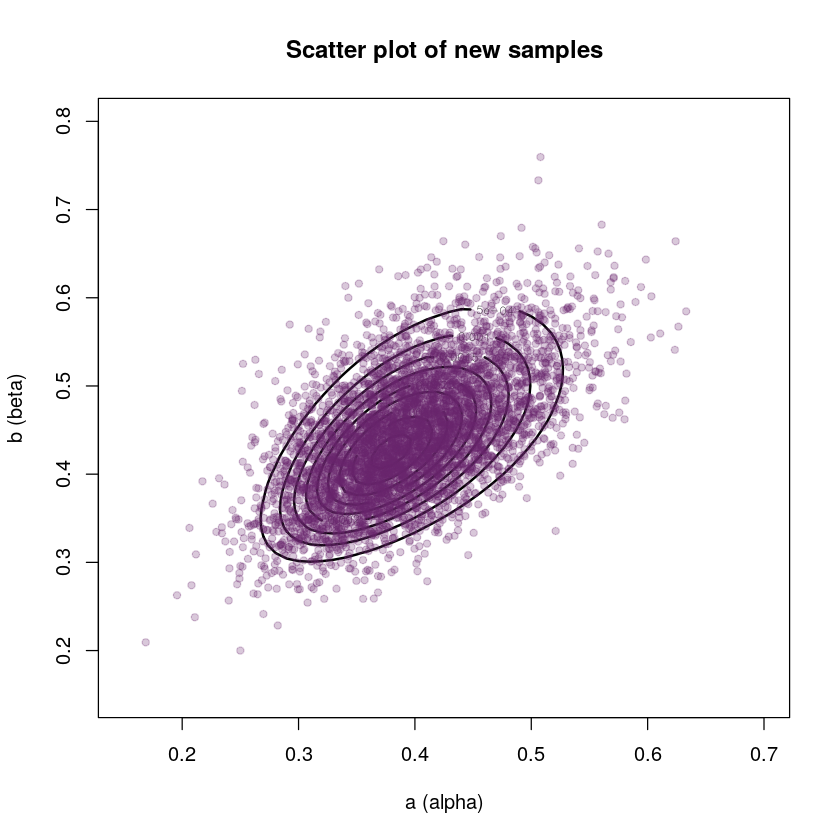

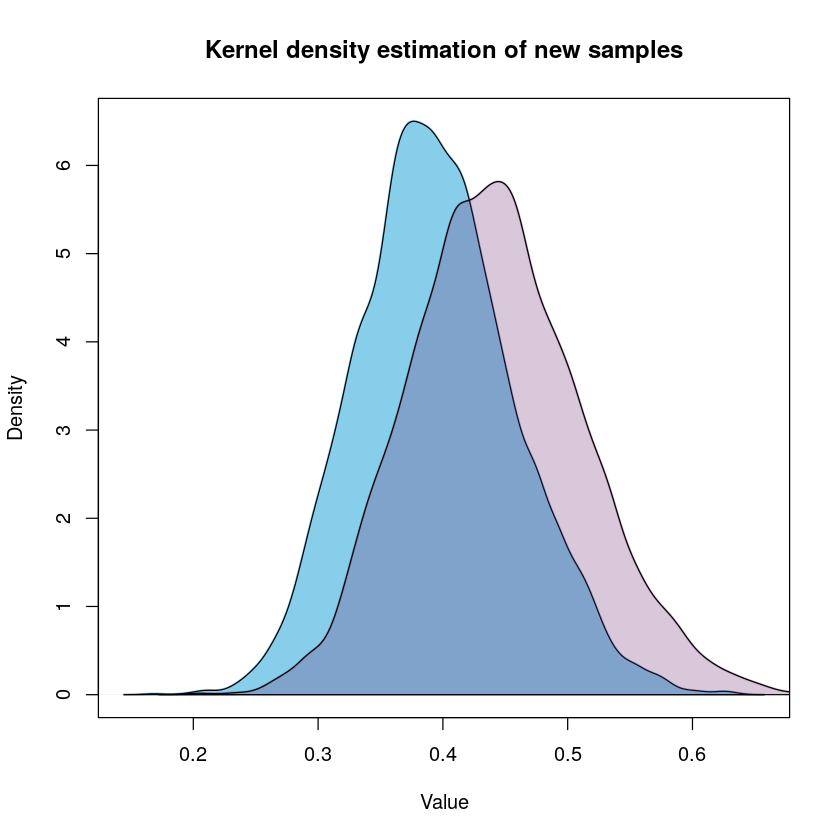

In [14]:
# YOUR CODE HERE

# Scatter plot of new samples on probability density contour plot
contour(a,b,normald3,lwd=2, xlim=c(0.15,0.7), ylim=c(0.15,0.8),main="Scatter plot of new samples", xlab="a (alpha)", ylab = "b (beta)")
points(gibbsSample[1,],gibbsSample[2,],col="#68246d40", pch=20, cex=1.2)

# Kernel density estimation of new samples of a and b
densa<-density(gibbsSample[1,],kernel = "gaussian",adjust=0.8)
densb<-density(gibbsSample[2,],kernel = "gaussian",adjust=0.8)
plot(densa,col='skyblue',lwd=2 ,main="Kernel density estimation of new samples", xlab="Value", ylab = "Density")
polygon(densa,col='skyblue')
lines(densb,col='#68246d40',lwd=2)
polygon(densb,col='#68246d40')


YOUR ANSWER HERE

-$Compare\ the\ results$-

From the scatter plot with a contour plot, lots of samples are located in the high probability region of the a and b grid. Question 8 have a high dimension probability density space. Sampling makes many new samples selected by high probability density. Therefore, after sampling, the expectation of a and b with variance is similar to question 8 values. These mean new samples follow base probability density distribution.

> Consider the histogram of $\{\hat{\theta}_{i}\}$ from Question 3 and the contour and scatter plots of $P(a, b \mid y, n)$ from questions 8 and 10.

# Question 11

Why are the high probability values of $(a, b)$ where they are? [2] Use a plot or plots to support your argument. [2]

What does the form of these results suggest about the labs that generated the data? [4]

Suggest an alternative modelling strategy that might be more suited to this data. [4]

## Answer 

YOUR ANSWER HERE

-$Why\ are\ the\ high\ probability\ values?$-

Because the previous probability density function of a and b has a high probability of 0.39 and 0.44 each, the sampling location also follows the probability density distribution. It follows like under the histogram. With histogram, we can find many samples located around the estimated mean value, which calculated previous probability density. It can calculate the expectation(mean) of a and b. If we sample from successive distributions in the chain and iterate long enough until stationary, our samples will become samples from 𝜋.


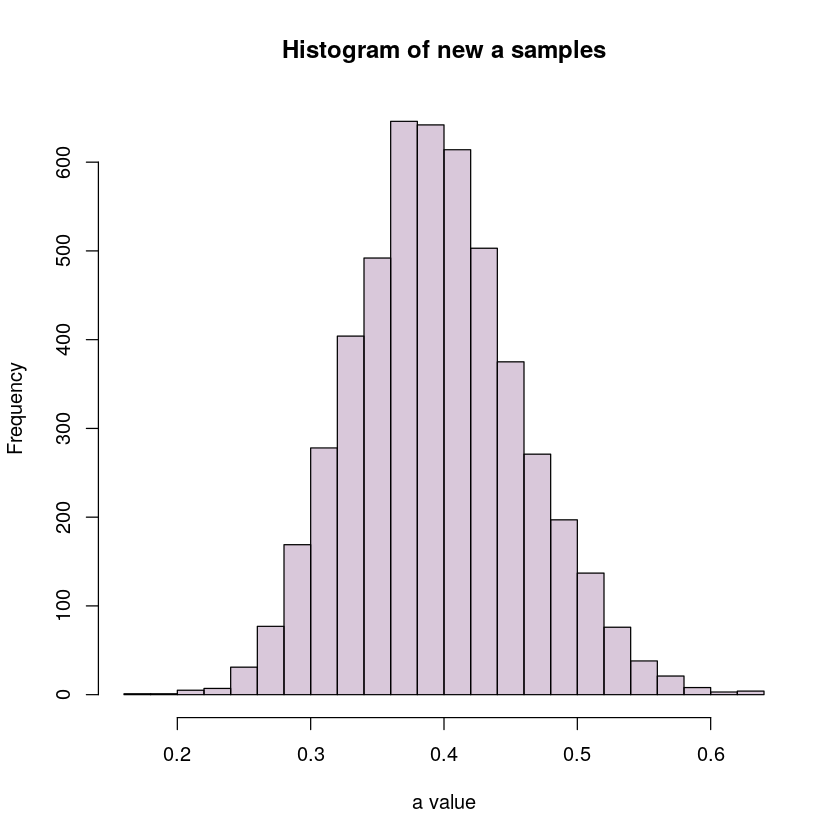

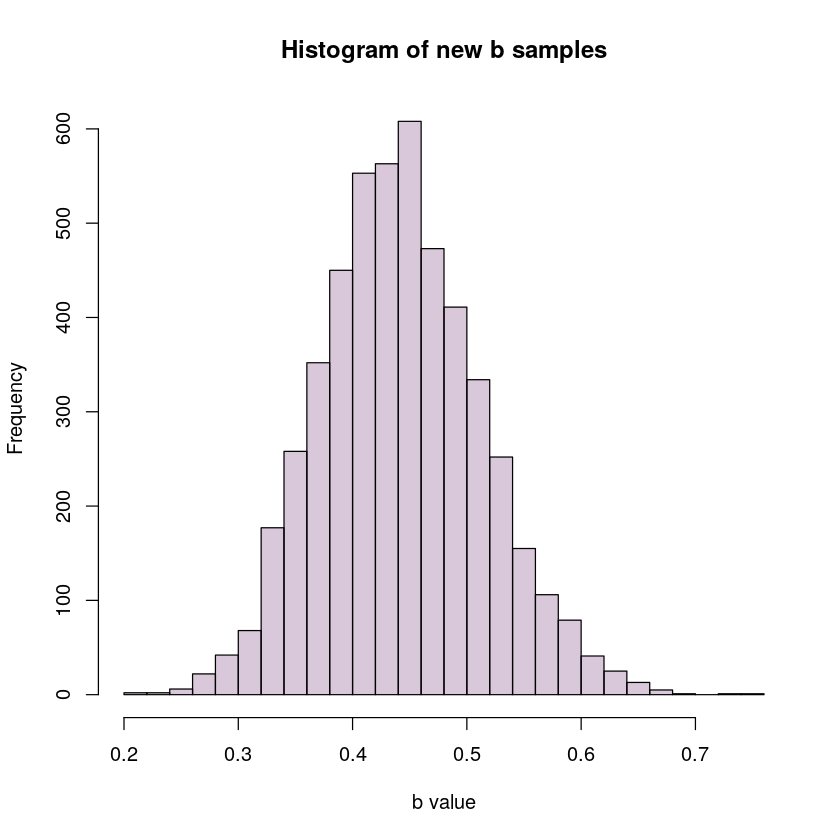

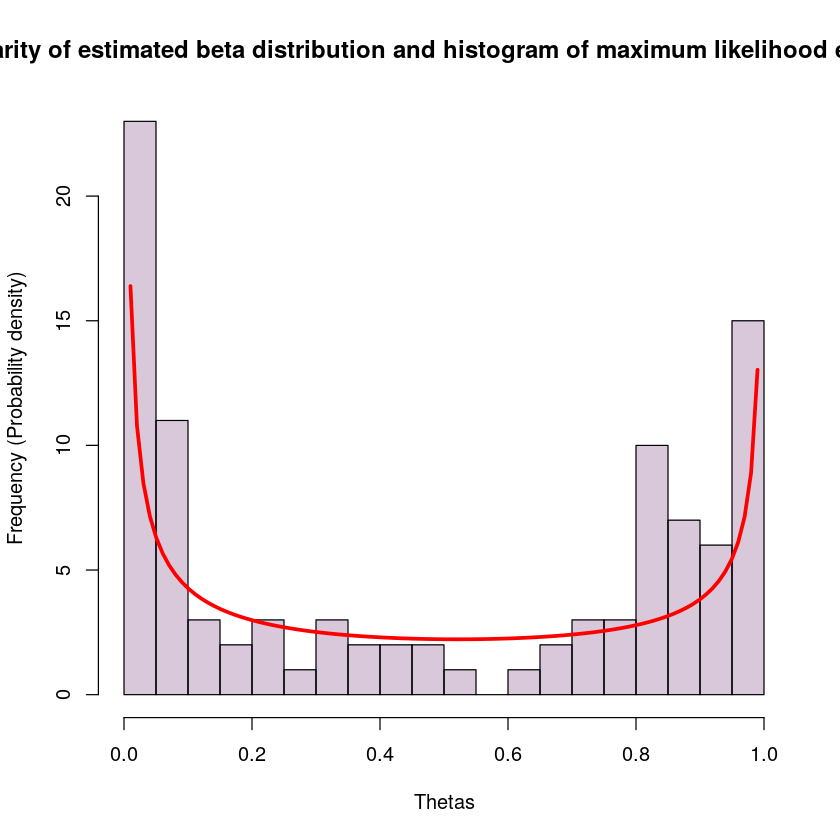

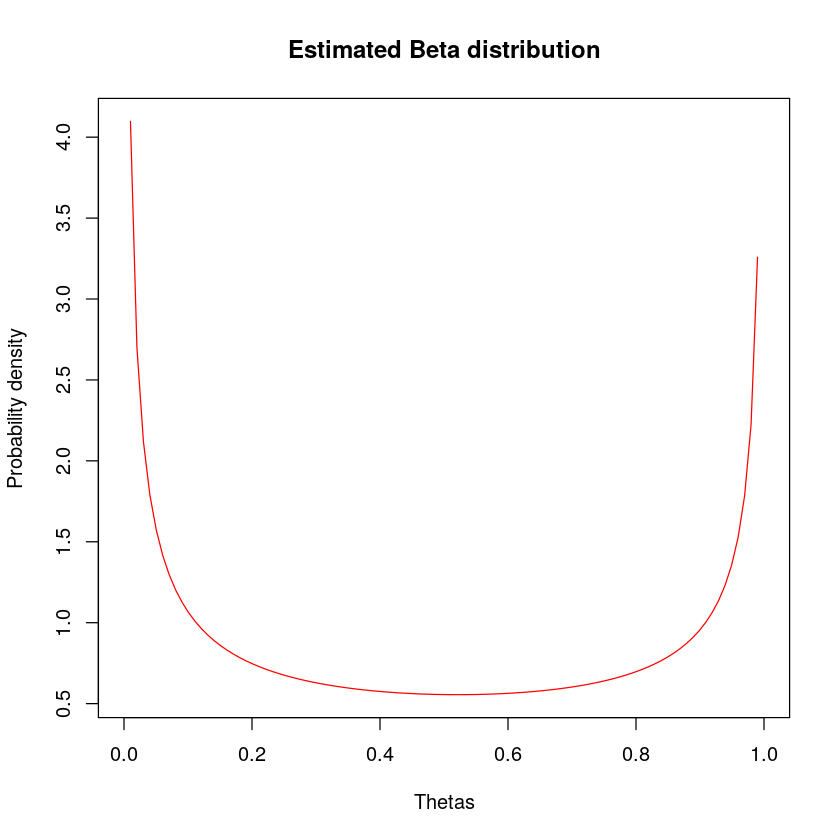

In [15]:
# YOUR CODE HERE

# Histogram of a and b
hist(gibbsSample[1,],breaks=30,main="Histogram of new a samples", xlab="a value", ylab = "Frequency", col="#68246d40")
hist(gibbsSample[2,],breaks=30,main="Histogram of new b samples", xlab="b value", ylab = "Frequency", col="#68246d40")

# Similarity of estimated beta distribution and histogram of maximum likelihood estimation
p = seq(0, 1, length=100)
hist(as.numeric(unlist(mles)),col="#68246d40",main="Similarity of estimated beta distribution and histogram of maximum likelihood estimation", xlab="Thetas", ylab = "Frequency (Probability density)", breaks=15)
lines(p, 4*dbeta(p, 0.39, 0.44), type='l',col='red',lwd=3)
plot(p, dbeta(p, 0.39, 0.44), type='l',col='red',lwd=1,main="Estimated Beta distribution", xlab="Thetas", ylab = "Probability density")

YOUR ANSWER HERE

-$Results\ suggest\ about\ the\ labs$-

The estimated expectation of alpha and beta could follow the same shape with Maximum Likelihood Estimation survival probability. This means that the posterior would be the same shape as Prior (because Posterior is multiplied by prior and likelihood), So it is easy to compute and easy to estimate.

And the shape of probability density shows that the high probability for theta is close to 0 and 1. Thinking about variance provides one explanation for the U-shaped Beta. As always, a larger sample size (𝛼+𝛽) decreases a distribution's variance, and a smaller sample size increases it. If Betas were limited to unimodal distributions, their variance could never reach its full potential. In order to maximize a Beta distribution's variance for a particular mean, the distribution must become bimodal, with its density concentrated at the two extremes. At the limit, as the variance approaches it is maximum (for any given mean), the Beta distribution approaches a Bernoulli distribution, and its variance likewise approaches the variance of a Bernoulli with its same mean.

So the lab experiment could explain as a binomial model, and estimated beta distribution could easily anticipate the result of posterior survival in labs.

YOUR ANSWER HERE

-$About\ selection\ of\ distribution\ for\ conjugate\ prior$-

Type of prior distribution does not matter on the result of posterior of labs but for the convenience of calculation and speed of computation is different, beta is an excellent way to choose because of conjugate prior. However, there is another distribution we could choose for the prior: Kumaraswamy's double bounded distribution, a family of continuous probability distributions defined on the interval (0,1). It is similar to the Beta distribution but much simpler to use, especially in simulation studies. 

-$About\ selection\ of\ modelling\ methodology\ for\ sampling$-

In the case of our problem, the lab modelled with binomial modelling, which means that it is highly independent, so for the sampling, the block sampling is faster for highly correlated or independent. In a Markov chain Monte Carlo (MCMC) framework, block sampling strategies often perform much better than algorithms based on one-at-a-time sampling strategies if “good” proposal distributions to update blocks of variables can be designed. Like MCMC, the efficiency of algorithms could be improved significantly by using block sampling strategies.